In [1]:
import pandas as pd
import numpy as np
import os

# Ensure the folder exists
os.makedirs('data', exist_ok=True)

# Generate a date range for every hour over two years
date_rng = pd.date_range(start='2021-01-01', end='2022-12-31 23:00:00', freq='H')

# Create a DataFrame with the date range
df = pd.DataFrame(date_rng, columns=['timestamp'])

# Calculate day of year for seasonal patterns
df['day_of_year'] = df['timestamp'].dt.dayofyear

# Constants for seasonal calculations
pi = np.pi

# Generate temperature data with a seasonal cycle
df['temperature'] = (
    10  # Base temperature
    + 15 * np.sin(2 * pi * df['day_of_year'] / 365)  # Seasonal variation
    + 5 * np.random.randn(len(df))  # Random noise
)

# Generate humidity data with a seasonal cycle
df['humidity'] = (
    50  # Base humidity
    + 30 * np.cos(2 * pi * df['day_of_year'] / 365)  # Seasonal variation
    + 10 * np.random.randn(len(df))  # Random noise
)

# Generate wind speed data with a seasonal cycle
df['wind_speed'] = (
    5  # Base wind speed
    + 2 * np.sin(2 * pi * df['day_of_year'] / 365 + pi / 4)  # Seasonal variation
    + 1 * np.random.randn(len(df))  # Random noise
)

# Generate precipitation data with a seasonal cycle
df['precipitation'] = (
    np.maximum(
        0,  # Precipitation can't be negative
        2  # Base precipitation
        + 2 * np.cos(2 * pi * df['day_of_year'] / 365 + pi / 2)  # Seasonal variation
        + 1 * np.random.randn(len(df))  # Random noise
    )
)

# Select the final columns
df_final = df[['timestamp', 'temperature', 'humidity', 'wind_speed', 'precipitation']]

# Save the dataset to a CSV file
df_final.to_csv('data/weather_data.csv', index=False)

print("Dataset generated and saved as 'weather_data.csv'.")


Dataset generated and saved as 'weather_data.csv'.


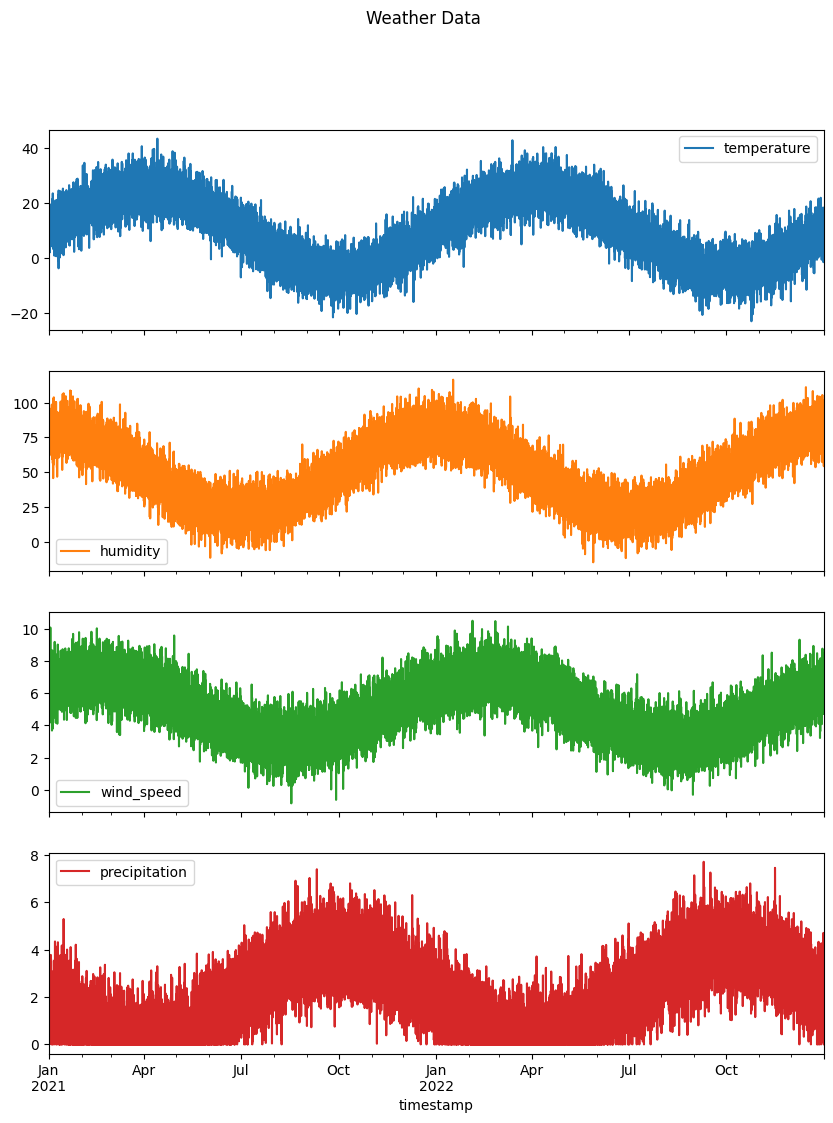

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset
df_loaded = pd.read_csv('data/weather_data.csv', parse_dates=['timestamp'])

# Plot the data
df_loaded.set_index('timestamp').plot(subplots=True, figsize=(10, 12), title='Weather Data')
plt.show()

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the original dataset
df = pd.read_csv('data/weather_data.csv', parse_dates=['timestamp'])

# Function to plot the data for visualization
def plot_variable(df, variable, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df[variable], label=variable)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(variable.capitalize())
    plt.legend()
    plt.show()


## Sudden drift

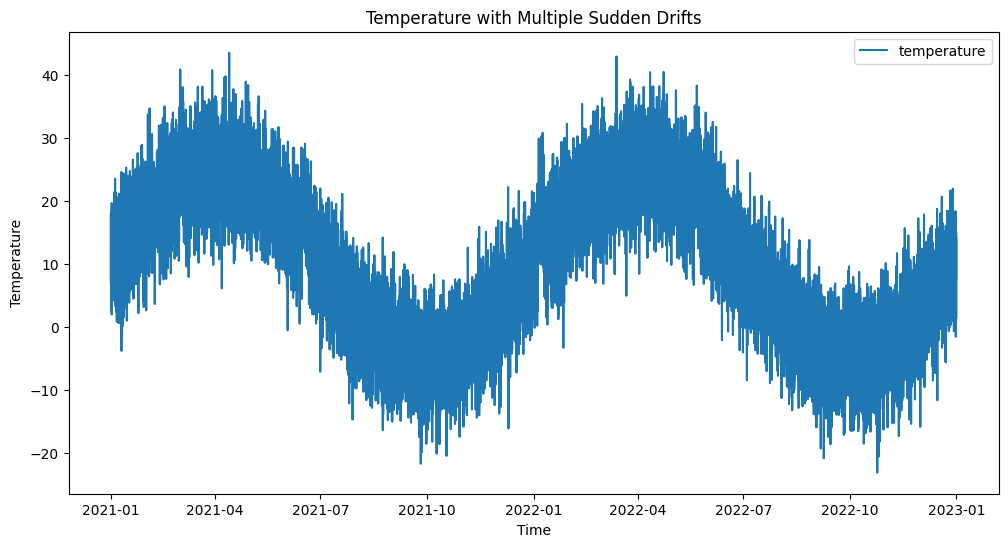

In [4]:
# Create a copy of the original dataset
df_sudden_drift = df.copy()

# Initialize the 'class' column with zeros
df_sudden_drift['class'] = 0

# Define points in time where sudden drifts will occur
drift_points = [
    ('2021-03-01', '2021-03-05'),
    ('2021-06-15', '2021-06-20'),
    ('2021-09-10', '2021-09-15'),
    ('2022-01-05', '2022-01-10'),
    ('2022-05-20', '2022-05-25')
]

# Introduce sudden drifts
for start_date, end_date in drift_points:
    mask = (df_sudden_drift['timestamp'] >= start_date) & (df_sudden_drift['timestamp'] <= end_date)
    df_sudden_drift.loc[mask, 'temperature'] += 5  # Sudden increase by 5 degrees
    df_sudden_drift.loc[mask, 'class'] = 1  # Mark drift period

# Save the dataset
df_sudden_drift.to_csv('data/weather_data_sudden_drift.csv', index=False)

# Plot for visualization
plot_variable(df_sudden_drift, 'temperature', 'Temperature with Multiple Sudden Drifts')


## Gradual drift

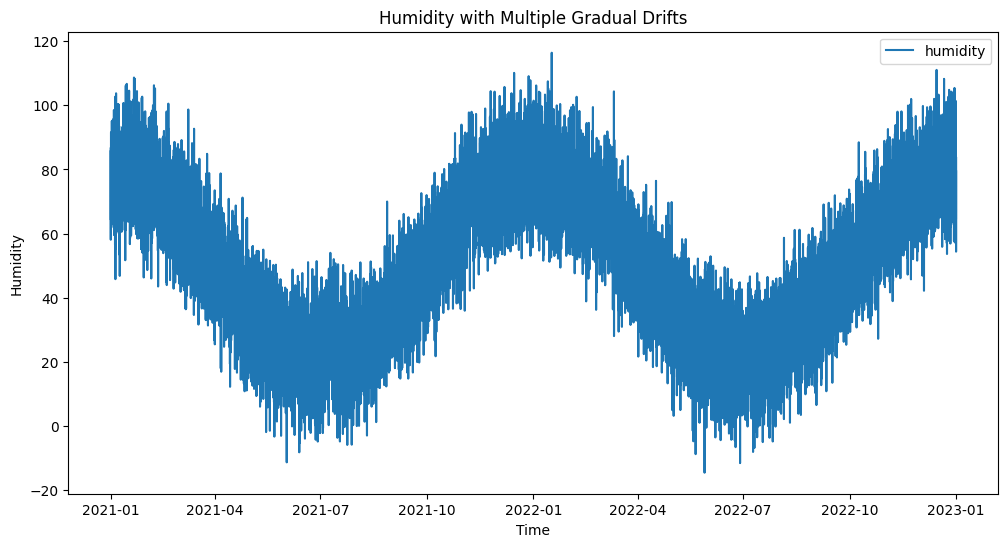

In [5]:
# Create a copy of the original dataset
df_gradual_drift = df.copy()

# Initialize the 'class' column with zeros
df_gradual_drift['class'] = 0

# Define periods where gradual drifts will occur
drift_periods = [
    ('2021-02-01', '2021-02-10'),
    ('2021-07-01', '2021-07-15'),
    ('2021-11-01', '2021-11-10'),
    ('2022-03-01', '2022-03-10'),
    ('2022-08-01', '2022-08-15')
]

# Introduce gradual drifts
for start_date, end_date in drift_periods:
    mask = (df_gradual_drift['timestamp'] >= start_date) & (df_gradual_drift['timestamp'] <= end_date)
    duration = (df_gradual_drift.loc[mask, 'timestamp'] - df_gradual_drift.loc[mask, 'timestamp'].min()).dt.total_seconds()
    max_duration = duration.max()
    drift_amount = (duration / max_duration) * 10  # Gradual increase up to +10
    df_gradual_drift.loc[mask, 'humidity'] += drift_amount
    df_gradual_drift.loc[mask, 'class'] = 1  # Mark drift period

# Save the dataset
df_gradual_drift.to_csv('data/weather_data_gradual_drift.csv', index=False)

# Plot for visualization
plot_variable(df_gradual_drift, 'humidity', 'Humidity with Multiple Gradual Drifts')


## Recurring drift

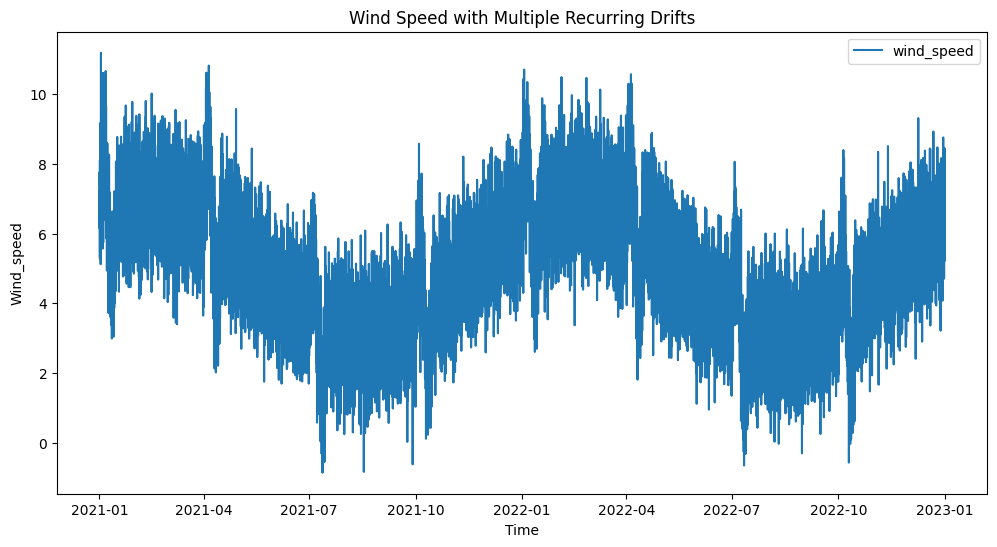

In [6]:
# Create a copy of the original dataset
df_recurring_drift = df.copy()

# Initialize the 'class' column with zeros
df_recurring_drift['class'] = 0

# Define periods where recurring drifts will occur
drift_intervals = [
    ('2021-01-01', '2021-01-15'),
    ('2021-04-01', '2021-04-15'),
    ('2021-07-01', '2021-07-15'),
    ('2021-10-01', '2021-10-15'),
    ('2022-01-01', '2022-01-15'),
    ('2022-04-01', '2022-04-15'),
    ('2022-07-01', '2022-07-15'),
    ('2022-10-01', '2022-10-15')
]

# Introduce recurring drifts
for start_date, end_date in drift_intervals:
    mask = (df_recurring_drift['timestamp'] >= start_date) & (df_recurring_drift['timestamp'] <= end_date)
    days = (df_recurring_drift.loc[mask, 'timestamp'] - pd.Timestamp(start_date)).dt.total_seconds() / (24 * 3600)
    drift_pattern = np.sin(2 * np.pi * days / 15)  # Drift over 15 days
    df_recurring_drift.loc[mask, 'wind_speed'] += drift_pattern * 2  # Amplitude of 2
    df_recurring_drift.loc[mask, 'class'] = 1  # Mark drift period

# Save the dataset
df_recurring_drift.to_csv('data/weather_data_recurring_drift.csv', index=False)

# Plot for visualization
plot_variable(df_recurring_drift, 'wind_speed', 'Wind Speed with Multiple Recurring Drifts')


## Incremental drift

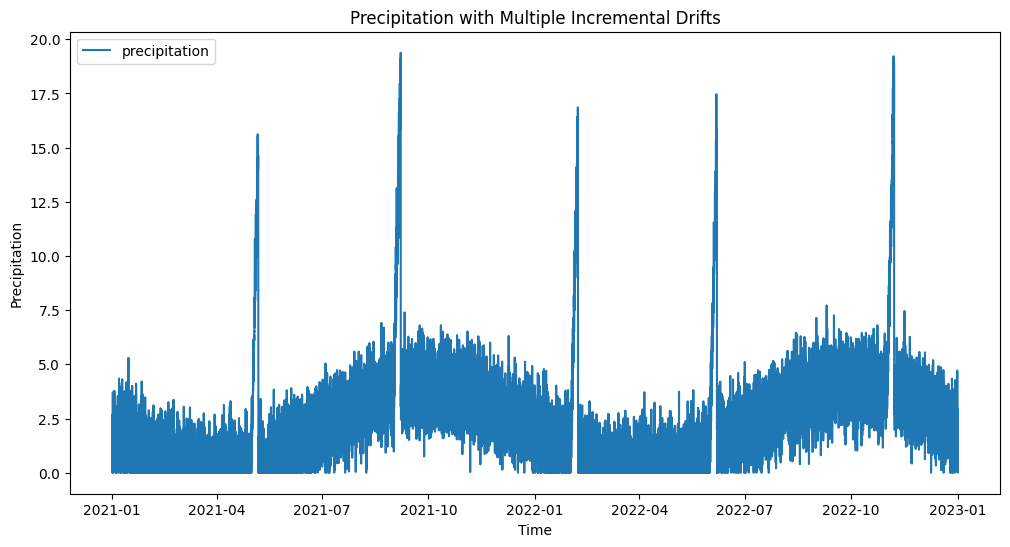

In [7]:
# Create a copy of the original dataset
df_incremental_drift = df.copy()

# Initialize the 'class' column with zeros
df_incremental_drift['class'] = 0

# Define periods where incremental drifts will occur
drift_periods = [
    ('2021-05-01', '2021-05-07'),
    ('2021-09-01', '2021-09-07'),
    ('2022-02-01', '2022-02-07'),
    ('2022-06-01', '2022-06-07'),
    ('2022-11-01', '2022-11-07')
]

# Introduce incremental drifts
for start_date, end_date in drift_periods:
    mask = (df_incremental_drift['timestamp'] >= start_date) & (df_incremental_drift['timestamp'] <= end_date)
    increment = 0.1  # Increment per hour
    hours = np.arange(len(df_incremental_drift.loc[mask]))
    df_incremental_drift.loc[mask, 'precipitation'] += increment * hours
    df_incremental_drift.loc[mask, 'class'] = 1  # Mark drift period

# Save the dataset
df_incremental_drift.to_csv('data/weather_data_incremental_drift.csv', index=False)

# Plot for visualization
plot_variable(df_incremental_drift, 'precipitation', 'Precipitation with Multiple Incremental Drifts')


In [8]:
# Drop the first column
df_no_date = df_recurring_drift.drop(columns=df.columns[0])

# Save the modified dataframe to a CSV file
df_no_date.to_csv('data/weather_data_no_date.csv', index=False)

print("First column dropped and dataset saved as 'weather_data_dropped.csv'.")

First column dropped and dataset saved as 'weather_data_dropped.csv'.
